In [1]:
%run "..\..\Startup_py3.py"
sys.path.append(r"..\..\..\..\Documents")

import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import *
print(os.getpid())

import h5py
from ImageAnalysis3.classes import _allowed_kwds
import ast

11448


In [121]:
from tqdm.notebook import tqdm
%matplotlib inline

In [2]:
save_fig_folder = r'X:\IgH_analyzed_results\IgH_results'

In [3]:
# load features
feature_2_reg_id = pickle.load(open(os.path.join(r'\\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-08_IgH', 'matched_feature_dict.pkl'), 'rb'))

In [4]:
bone_marrow_data = pickle.load(open(r'\\10.245.74.212\Chromatin_NAS_2\IgH_analyzed_results\20201012_bone_marrow_igh++\Picked_spots_fov_3-12.pkl','rb'))

In [5]:
from scipy.spatial.distance import pdist, squareform
distmaps = np.array([squareform(pdist(_hzxys[:,1:4])) for _hzxys in bone_marrow_data['hzxys']])
median_distmap = np.nanmedian(distmaps, axis=0)
loss_rates = np.mean(np.sum(np.isnan(bone_marrow_data['hzxys']), axis=2)>0, axis=0)

In [96]:
bone_marrow_reg_ids = np.array([ 41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,
        54,  55,  56,  57,  59,  60,  61,  62,  63,  64,  65,  66,  67,
        68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,
        81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,
        94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106,
       107, 108, 109, 110, 111, 112, 113, 114, 115, 321, 323, 324, 325,
       326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 337, 339, 340,
       341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353,
       354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366,
       367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 379, 380,
       381, 382, 383, 384, 386, 387, 388, 389, 390, 391, 392, 393, 394,
       395])

v_unit_2_inds = {_k: list(bone_marrow_reg_ids).index(_v) for _k, _v in feature_2_reg_id.items() if 'Ighv' in _k}
d_unit_2_inds = {_k: list(bone_marrow_reg_ids).index(_v) for _k, _v in feature_2_reg_id.items() if 'Ighd' in _k}
j_unit_2_inds = {_k: list(bone_marrow_reg_ids).index(_v) for _k, _v in feature_2_reg_id.items() if 'Ighj' in _k}

In [97]:
save_fig_folder = os.path.join(save_fig_folder, 'v2')
os.makedirs(save_fig_folder)

<IPython.core.display.Javascript object>


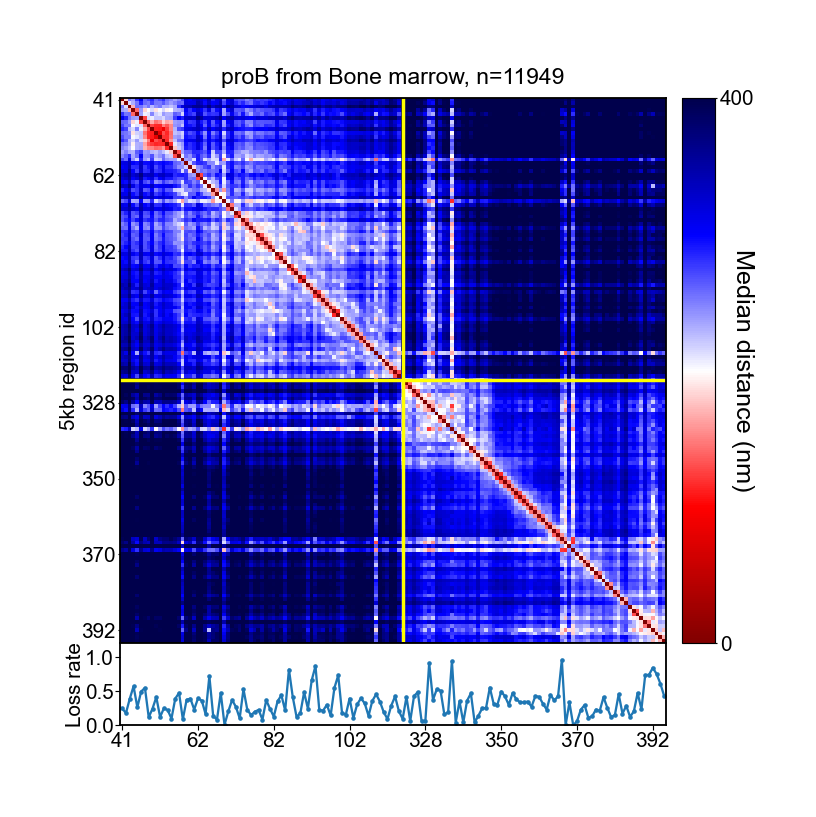

<ipython-input-98-b49882676b03>:63: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("seismic"))
  contact_cmap.set_bad(color=[0.,0.,0.,1])


<IPython.core.display.Javascript object>


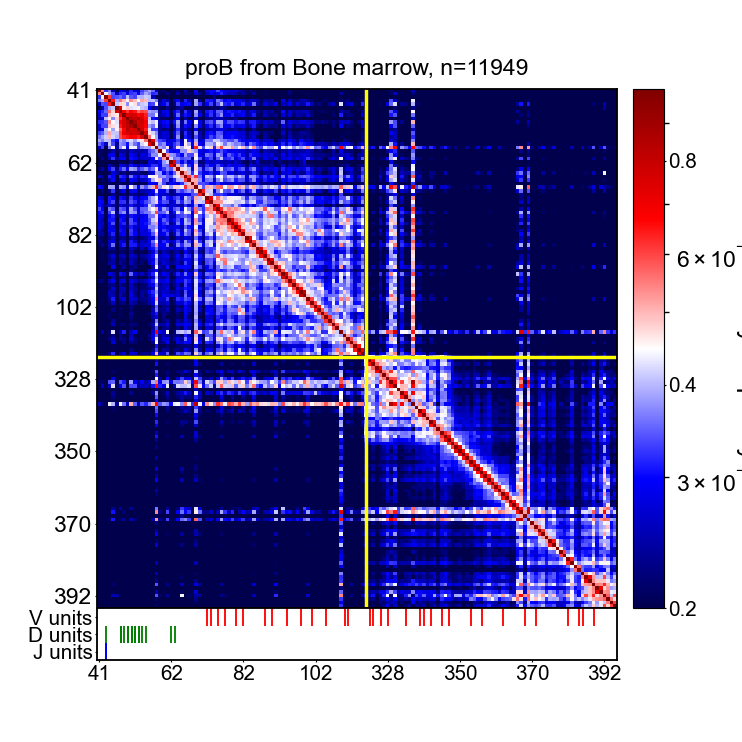

<ipython-input-98-b49882676b03>:72: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  _pf = ax1.imshow(contact_map, cmap=contact_cmap, norm=contact_norm,vmin=contact_limits[0],


In [98]:
# Required plotting parameters
from ImageAnalysis3.figure_tools import _dpi,_single_col_width,_double_col_width,_single_row_height,_ref_bar_length, _ticklabel_size,_ticklabel_width
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib
from matplotlib.colors import LogNorm
_font_size = 9

color_limits = [0, 400]

fig, ax1 = plt.subplots(figsize=(_single_col_width*2, _single_col_width*2), dpi=150, )

ax1.set_title(f"proB from Bone marrow, n={len(distmaps)}", fontsize=10)
_pf = ax1.imshow(median_distmap, cmap='seismic_r', vmin=min(color_limits), vmax=max(color_limits))
ax1.axvline(x=np.where(bone_marrow_reg_ids>300)[0][0], color=[1,1,0])
ax1.axhline(y=np.where(bone_marrow_reg_ids>300)[0][0], color=[1,1,0])
_ticks = np.arange(0, len(bone_marrow_reg_ids), 20)
ax1.set_xticks(_ticks)
ax1.set_xticklabels(bone_marrow_reg_ids[_ticks])
ax1.set_yticks(_ticks)
ax1.set_yticklabels(bone_marrow_reg_ids[_ticks])
ax1.set_ylabel(f"5kb region id", fontsize=_font_size, labelpad=1)


ax1.tick_params('both', labelsize=_font_size, 
                width=_ticklabel_width, length=_ticklabel_size-1,
                pad=1, labelbottom=False) # remove bottom ticklabels for ax1
# locate ax1
divider = make_axes_locatable(ax1)
# colorbar ax
cax = divider.append_axes('right', size='6%', pad="3%")
cbar = plt.colorbar(_pf,cax=cax, ax=ax1, ticks=color_limits)
cbar.ax.tick_params('both', labelsize=_font_size, 
                width=_ticklabel_width, length=_ticklabel_size-1,
                pad=1, labelleft=False) # remove bottom ticklabels for ax1
cbar.outline.set_linewidth(_ticklabel_width)
cbar.set_label('Median distance (nm)',
               fontsize=_font_size+2, labelpad=0, rotation=270)
# create bottom ax
bot_ax = divider.append_axes('bottom', size='15%', pad="0%", 
                             sharex=ax1, xticks=np.arange(0,len(median_distmap), 50), yticks=[0,0.5,1] )

bot_ax.plot(loss_rates, '.-', markersize=2, linewidth=1)
bot_ax.set_xticks(np.arange(0,len(median_distmap),20))
bot_ax.set_ylim([0,1.2])
bot_ax.set_ylabel(f"Loss rate", fontsize=9, labelpad=0)
bot_ax.tick_params('both', labelsize=_font_size, 
                   width=_ticklabel_width, length=_ticklabel_size,
                   pad=1, labelleft=True) # remove bottom ticklabels for ax1
plt.savefig(os.path.join(save_fig_folder, 'bone_marrow_median_loss.png'), transparent=True)
plt.show()


from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib
from matplotlib.colors import LogNorm

_font_size = 9

contact_limits = [0.2, 1]
contact_norm = LogNorm(vmin=np.min(contact_limits), 
                       vmax=np.max(contact_limits))
contact_cmap = matplotlib.cm.get_cmap('seismic')
contact_cmap.set_bad(color=[0.,0.,0.,1])

contact_th = 200
contact_map = (distmaps < contact_th).sum(0) / (np.isnan(distmaps)==False).sum(0)

fig, ax1 = plt.subplots(figsize=(_single_col_width*2, _single_col_width*2), dpi=150, )
#_pf = ax1.imshow(median_distmap, cmap='seismic_r', vmin=0, vmax=600)
ax1.set_title(f"proB from Bone marrow, n={len(distmaps)}", fontsize=10)

_pf = ax1.imshow(contact_map, cmap=contact_cmap, norm=contact_norm,vmin=contact_limits[0],
                       vmax=contact_limits[1])

ax1.axvline(x=np.where(bone_marrow_reg_ids>300)[0][0], color=[1,1,0])
ax1.axhline(y=np.where(bone_marrow_reg_ids>300)[0][0], color=[1,1,0])
ax1.set_xticks(_ticks)
ax1.set_xticklabels(bone_marrow_reg_ids[_ticks])
ax1.set_yticks(_ticks)
ax1.set_yticklabels(bone_marrow_reg_ids[_ticks])
ax1.tick_params('both', labelsize=_font_size+1, 
                width=_ticklabel_width, length=_ticklabel_size-1,
                pad=1, labelbottom=False) # remove bottom ticklabels for ax1
# locate ax1
divider = make_axes_locatable(ax1)
# colorbar ax
cax = divider.append_axes('right', size='6%', pad="3%")
colorbar_ticks = [0.05, 0.1, 0.2, 0.4, 0.8]
cbar = plt.colorbar(_pf,cax=cax, ax=ax1, ticks=colorbar_ticks)
cbar.ax.set_yticklabels(colorbar_ticks)
cbar.ax.tick_params('both', labelsize=_font_size, 
                width=_ticklabel_width, length=_ticklabel_size-1,
                pad=1, labelleft=False) # remove bottom ticklabels for ax1
cbar.outline.set_linewidth(_ticklabel_width)
cbar.set_label('Proximity frequency',
               fontsize=_font_size+2, labelpad=2.5, rotation=270)
# create bottom ax
bot_ax = divider.append_axes('bottom', size='10%', pad="0%", 
                             sharex=ax1, xticks=np.arange(0,len(median_distmap), 20) )

bot_ax.eventplot(list(v_unit_2_inds.values()), lineoffsets=2.5, linewidths=0.8, colors='r')
bot_ax.eventplot(list(d_unit_2_inds.values()), lineoffsets=1.5, linewidths=0.8, colors='g')
bot_ax.eventplot(list(j_unit_2_inds.values()), lineoffsets=0.5, linewidths=0.8, colors='b')
bot_ax.set_ylim([0,3])
bot_ax.set_yticks([2.5,1.5, 0.5])
bot_ax.set_yticklabels(["V units", "D units", "J units"], fontsize=_font_size)
bot_ax.tick_params('both', labelsize=_font_size, 
                   width=_ticklabel_width, length=_ticklabel_size-1,
                   pad=1, labelleft=True) # remove bottom ticklabels for bot_ax
plt.savefig(os.path.join(save_fig_folder, 'bone_marrow_proximity_vdj_feature.png'), transparent=True)
plt.show()

In [99]:
segment_dict = {'proximal':np.where(bone_marrow_reg_ids<300)[0], 'distal':np.where(bone_marrow_reg_ids>300)[0]}

# density for the entire chr
import multiprocessing as mp
num_threads=12
density_var = 75 # nm

_dna_density_args = [(_hzxys,_hzxys, segment_dict, [density_var,density_var,density_var], True) 
                     for _hzxys in bone_marrow_data['hzxys']]
_dna_density_time = time.time()

print(f"Multiprocessing calculate dna_density_scores", end=' ')
with mp.Pool(num_threads) as dna_density_pool:
    bone_marrow_density_dicts = dna_density_pool.starmap(spot_density_scores, _dna_density_args)
    dna_density_pool.close()
    dna_density_pool.join()
    dna_density_pool.terminate()
print(f"in {time.time()-_dna_density_time:.3f}s.")

Multiprocessing calculate dna_density_scores in 16.594s.


<IPython.core.display.Javascript object>


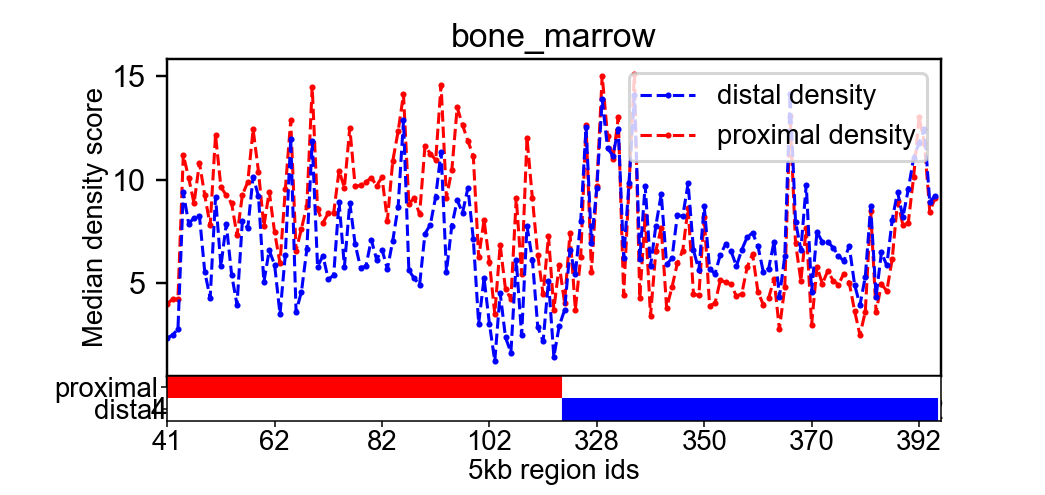

In [94]:
# Calculate mean proximal, distal density
mean_proximal_scores = np.nanmedian([_s['proximal'] for _s in bone_marrow_density_dicts], axis=0)
mean_distal_scores = np.nanmedian([_s['distal'] for _s in bone_marrow_density_dicts], axis=0)

# Plot
fig = plt.figure(figsize=(_double_col_width, _single_col_width),dpi=200)
grid = plt.GridSpec(2, 1, height_ratios=[7,1], hspace=0., wspace=0.2)

main_ax = plt.subplot(grid[0], xticklabels=[])

main_ax.plot(mean_proximal_scores, 'r.--', label='proximal density', markersize=2, linewidth=1)
main_ax.plot(mean_distal_scores, 'b.--', label='distal density', markersize=2, linewidth=1)
main_ax.set_ylabel(f"Median density score", fontsize=_font_size, labelpad=1)

main_ax.set_title('bone_marrow', fontsize=_font_size+2, pad=4)


handles, labels = main_ax.get_legend_handles_labels()
main_ax.legend(handles[::-1], labels[::-1], fontsize=_font_size, loc='upper right')
main_ax.set_xlim(0,len(mean_proximal_scores))

comp_ax = plt.subplot(grid[1], xticklabels=[], sharex=main_ax)
comp_ax.eventplot([segment_dict['proximal'], segment_dict['distal']], lineoffsets=[0.5,-0.5],linelengths=1, linewidths=2,
                   colors=np.array([[1, 0, 0],[0, 0, 1]]))
comp_ax.tick_params('both', labelsize=_font_size, 
                    width=_ticklabel_width, length=_ticklabel_size,
                    pad=1, labelbottom=True) # remove bottom ticklabels for ax1
[i[1].set_linewidth(_ticklabel_width) for i in comp_ax.spines.items()]

comp_ax.set_yticks([0.5,-0.5])
comp_ax.set_yticklabels(["proximal","distal"])
comp_ax.set_ylim([-1,1])

_ticks = np.arange(0, len(bone_marrow_reg_ids), 20)
comp_ax.set_xticks(_ticks)
comp_ax.set_xticklabels(bone_marrow_reg_ids[_ticks])
comp_ax.set_xlabel(f'5kb region ids', fontsize=_font_size, labelpad=1)

plt.gcf().subplots_adjust(bottom=0.15, left=0.16)
save_file = os.path.join(save_fig_folder, f'bone_marrow_density.png')
plt.savefig(save_file, transparent=True)
plt.show()

<ipython-input-57-fe024a967494>:17: RuntimeWarning: Mean of empty slice
  _frac_b = 1-np.nanmean(_id_vector[np.where(_den_b >= _th_b)[0]])


<ipython-input-57-fe024a967494>:16: RuntimeWarning: Mean of empty slice
  _frac_a = np.nanmean(_id_vector[np.where(_den_a >= _th_a)[0]])


<IPython.core.display.Javascript object>


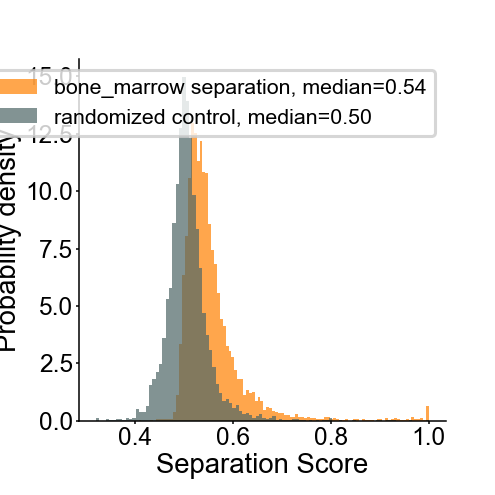

In [95]:
bone_marrow_separations = [separation_score(_density_dict, 'proximal', 'distal', segment_dict) 
                    for _density_dict in tqdm(bone_marrow_density_dicts)]
randomized_bone_marrow_separations = [separation_score(_density_dict, 'proximal', 'distal', 
                                                randomize_AB_dict(segment_dict, 'proximal', 'distal')) 
                               for _density_dict in tqdm(bone_marrow_density_dicts)]


fig, ax = plt.subplots(figsize=(_single_col_width, _single_col_width), dpi=200)
ax.hist(bone_marrow_separations, 100, #range=(0,1000), 
        density=True,  color=[1,0.5,0],
        alpha=0.7, label=f'bone_marrow separation, median={np.nanmedian(bone_marrow_separations):.2f}')
ax.hist(randomized_bone_marrow_separations, 100, #range=(0,1000), 
        density=True,  color=[0.3,0.4,0.4],
        alpha=0.7, label=f'randomized control, median={np.nanmedian(randomized_bone_marrow_separations):.2f}')

ax.tick_params('both', labelsize=_font_size-1, 
                width=_ticklabel_width, length=_ticklabel_size-1,
                pad=1, labelleft=True) # remove bottom ticklabels for ax
[i[1].set_linewidth(_ticklabel_width) for i in ax.spines.items()]

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(fontsize=_font_size-2)
ax.set_xlabel("Separation Score", labelpad=1, fontsize=_font_size)
ax.set_ylabel("Probability density", labelpad=1, fontsize=_font_size)
plt.gcf().subplots_adjust(bottom=0.15, left=0.16)
save_file = os.path.join(save_fig_folder, f'bone_marrow_separation.png')
plt.savefig(save_file, transparent=True)
plt.show()

In [23]:
from ImageAnalysis3.compartment_tools.scoring import spot_density_scores

In [49]:
def randomize_AB_dict(AB_dict, na='A', nb='B'):
    all_regs = np.sort(np.concatenate(list(AB_dict.values())))
    AB_identities = np.zeros(len(all_regs))
    AB_identities[np.array([_i for _i,_r in enumerate(all_regs) 
                            if _r in AB_dict[na]])] = 1
    # randomize new start
    new_start = np.random.randint(0, len(all_regs))
    new_AB_identities = np.concatenate([AB_identities[new_start:], AB_identities[:new_start]])
    # recreate AB_dict
    new_AB_dict = {na: np.sort(all_regs[np.where(new_AB_identities==1)[0]]),
                   nb: np.sort(all_regs[np.where(new_AB_identities==0)[0]]),}
    return new_AB_dict

In [57]:
from scipy.stats import scoreatpercentile
def separation_score(density_dict, na, nb, identity_dict, 
                     cloud_th_per=67):
    """"""
    # identity vector
    _id_vector = np.ones(max(np.max(identity_dict[na]), np.max(identity_dict[nb]))+1 ) * np.nan
    _id_vector[identity_dict[na]] = 1
    _id_vector[identity_dict[nb]] = 0
    # generate a 
    _den_a = density_dict[na]
    _den_b = density_dict[nb]
    # define A,B threshold based on their own densities
    _th_a = scoreatpercentile(_den_a[identity_dict[na]], 100-cloud_th_per)
    _th_b = scoreatpercentile(_den_b[identity_dict[nb]], 100-cloud_th_per)
    # calculate purity within A,B clouds
    _frac_a = np.nanmean(_id_vector[np.where(_den_a >= _th_a)[0]])
    _frac_b = 1-np.nanmean(_id_vector[np.where(_den_b >= _th_b)[0]])
    
    return np.mean([_frac_a,_frac_b])

# iaa dox

In [105]:
iaa_dox_data = pickle.load(open(r'\\10.245.74.212\Chromatin_NAS_2\IgH_analyzed_results\20210320_IgH_proB_iaa_dox+\Picked_spots_fov_30-49.pkl','rb'))

In [106]:
from scipy.spatial.distance import pdist, squareform
distmaps = np.array([squareform(pdist(_hzxys[:,1:4])) for _hzxys in iaa_dox_data['hzxys']])
median_distmap = np.nanmedian(distmaps, axis=0)
loss_rates = np.mean(np.sum(np.isnan(iaa_dox_data['hzxys']), axis=2)>0, axis=0)

In [104]:
iaa_dox_reg_ids = np.array([ 41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,
        54,  55,  56,  57,  59,  60,  61,  62,  63,  64,  65,  66,  67,
        68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,
        81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,
        94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106,
       107, 108, 109, 110, 111, 112, 113, 114, 115, 321, 323, 324, 325,
       326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 337, 339, 340,
       341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353,
       354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366,
       367, 368, 369, 371, 373, 374, 375, 377, 381, 383, 384, 386, 387,
       388, 389, 390, 391, 392, 393, 394, 395])

v_unit_2_inds = {_k: list(iaa_dox_reg_ids).index(_v) for _k, _v in feature_2_reg_id.items() if 'Ighv' in _k}
d_unit_2_inds = {_k: list(iaa_dox_reg_ids).index(_v) for _k, _v in feature_2_reg_id.items() if 'Ighd' in _k}
j_unit_2_inds = {_k: list(iaa_dox_reg_ids).index(_v) for _k, _v in feature_2_reg_id.items() if 'Ighj' in _k}

<IPython.core.display.Javascript object>


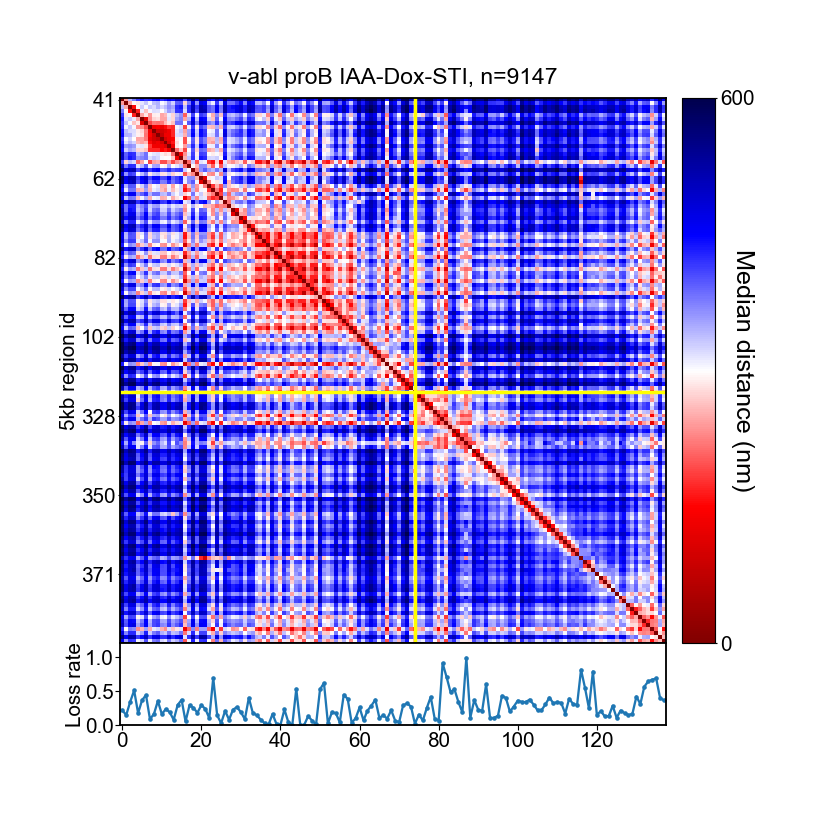

<ipython-input-107-5b77fe28445f>:59: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("seismic"))
  contact_cmap.set_bad(color=[0.,0.,0.,1])


<IPython.core.display.Javascript object>


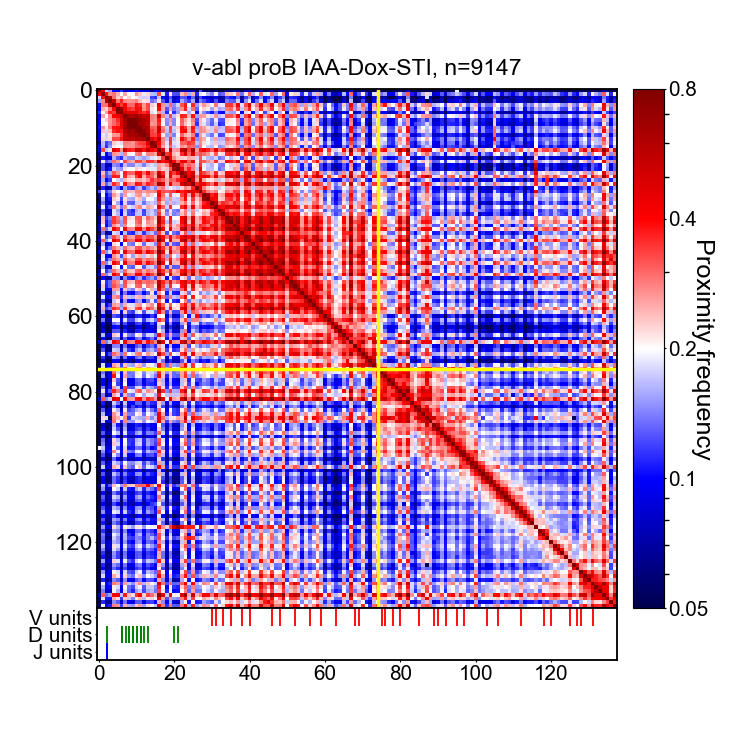

<ipython-input-107-5b77fe28445f>:68: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  _pf = ax1.imshow(contact_map, cmap=contact_cmap, norm=contact_norm,vmin=contact_limits[0],


In [107]:
# Required plotting parameters
from ImageAnalysis3.figure_tools import _dpi,_single_col_width,_double_col_width,_single_row_height,_ref_bar_length, _ticklabel_size,_ticklabel_width
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib
from matplotlib.colors import LogNorm
_font_size = 9

fig, ax1 = plt.subplots(figsize=(_single_col_width*2, _single_col_width*2), dpi=150, )

ax1.set_title(f"v-abl proB IAA-Dox-STI, n={len(distmaps)}", fontsize=10)
_pf = ax1.imshow(median_distmap, cmap='seismic_r', vmin=0, vmax=600)
ax1.axvline(x=np.where(iaa_dox_reg_ids>300)[0][0], color=[1,1,0])
ax1.axhline(y=np.where(iaa_dox_reg_ids>300)[0][0], color=[1,1,0])
_ticks = np.arange(0, len(iaa_dox_reg_ids), 20)
ax1.set_yticks(_ticks)
ax1.set_yticklabels(iaa_dox_reg_ids[_ticks])
ax1.set_ylabel(f"5kb region id", fontsize=_font_size, labelpad=1)


ax1.tick_params('both', labelsize=_font_size, 
                width=_ticklabel_width, length=_ticklabel_size-1,
                pad=1, labelbottom=False) # remove bottom ticklabels for ax1
# locate ax1
divider = make_axes_locatable(ax1)
# colorbar ax
cax = divider.append_axes('right', size='6%', pad="3%")
cbar = plt.colorbar(_pf,cax=cax, ax=ax1, ticks=[0, 600])
cbar.ax.tick_params('both', labelsize=_font_size, 
                width=_ticklabel_width, length=_ticklabel_size-1,
                pad=1, labelleft=False) # remove bottom ticklabels for ax1
cbar.outline.set_linewidth(_ticklabel_width)
cbar.set_label('Median distance (nm)',
               fontsize=_font_size+2, labelpad=0, rotation=270)
# create bottom ax
bot_ax = divider.append_axes('bottom', size='15%', pad="0%", 
                             sharex=ax1, xticks=np.arange(0,len(median_distmap), 50), yticks=[0,0.5,1] )

bot_ax.plot(loss_rates, '.-', markersize=2, linewidth=1)
bot_ax.set_xticks(np.arange(0,len(median_distmap),20))
bot_ax.set_ylim([0,1.2])
bot_ax.set_ylabel(f"Loss rate", fontsize=9, labelpad=0)
bot_ax.tick_params('both', labelsize=_font_size, 
                   width=_ticklabel_width, length=_ticklabel_size,
                   pad=1, labelleft=True) # remove bottom ticklabels for ax1
plt.savefig(os.path.join(save_fig_folder, 'iaa_dox_median_loss.png'), transparent=True)
plt.show()


from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib
from matplotlib.colors import LogNorm

_font_size = 9

contact_limits = [0.05, 0.8]
contact_norm = LogNorm(vmin=np.min(contact_limits), 
                       vmax=np.max(contact_limits))
contact_cmap = matplotlib.cm.get_cmap('seismic')
contact_cmap.set_bad(color=[0.,0.,0.,1])

contact_th = 200
contact_map = (distmaps < contact_th).sum(0) / (np.isnan(distmaps)==False).sum(0)

fig, ax1 = plt.subplots(figsize=(_single_col_width*2, _single_col_width*2), dpi=150, )
#_pf = ax1.imshow(median_distmap, cmap='seismic_r', vmin=0, vmax=600)
ax1.set_title(f"v-abl proB IAA-Dox-STI, n={len(distmaps)}", fontsize=10)

_pf = ax1.imshow(contact_map, cmap=contact_cmap, norm=contact_norm,vmin=contact_limits[0],
                       vmax=contact_limits[1])

ax1.axvline(x=np.where(iaa_dox_reg_ids>300)[0][0], color=[1,1,0])
ax1.axhline(y=np.where(iaa_dox_reg_ids>300)[0][0], color=[1,1,0])
ax1.tick_params('both', labelsize=_font_size+1, 
                width=_ticklabel_width, length=_ticklabel_size-1,
                pad=1, labelbottom=False) # remove bottom ticklabels for ax1
# locate ax1
divider = make_axes_locatable(ax1)
# colorbar ax
cax = divider.append_axes('right', size='6%', pad="3%")
colorbar_ticks = [0.05, 0.1, 0.2, 0.4, 0.8]
cbar = plt.colorbar(_pf,cax=cax, ax=ax1, ticks=colorbar_ticks)
cbar.ax.set_yticklabels(colorbar_ticks)
cbar.ax.tick_params('both', labelsize=_font_size, 
                width=_ticklabel_width, length=_ticklabel_size-1,
                pad=1, labelleft=False) # remove bottom ticklabels for ax1
cbar.outline.set_linewidth(_ticklabel_width)
cbar.set_label('Proximity frequency',
               fontsize=_font_size+2, labelpad=2.5, rotation=270)
# create bottom ax
bot_ax = divider.append_axes('bottom', size='10%', pad="0%", 
                             sharex=ax1, xticks=np.arange(0,len(median_distmap), 20) )

bot_ax.eventplot(list(v_unit_2_inds.values()), lineoffsets=2.5, linewidths=0.8, colors='r')
bot_ax.eventplot(list(d_unit_2_inds.values()), lineoffsets=1.5, linewidths=0.8, colors='g')
bot_ax.eventplot(list(j_unit_2_inds.values()), lineoffsets=0.5, linewidths=0.8, colors='b')
bot_ax.set_ylim([0,3])
bot_ax.set_yticks([2.5,1.5, 0.5])
bot_ax.set_yticklabels(["V units", "D units", "J units"], fontsize=_font_size)
bot_ax.tick_params('both', labelsize=_font_size, 
                   width=_ticklabel_width, length=_ticklabel_size-1,
                   pad=1, labelleft=True) # remove bottom ticklabels for bot_ax
plt.savefig(os.path.join(save_fig_folder, 'iaa_dox_proximity_vdj_feature.png'), transparent=True)
plt.show()

In [109]:
segment_dict = {'proximal':np.where(iaa_dox_reg_ids<300)[0], 'distal':np.where(iaa_dox_reg_ids>300)[0]}

# density for the entire chr
import multiprocessing as mp
num_threads=12
density_var = 75 # nm

_dna_density_args = [(_hzxys,_hzxys, segment_dict, [density_var,density_var,density_var], True) 
                     for _hzxys in iaa_dox_data['hzxys']]
_dna_density_time = time.time()

print(f"Multiprocessing calculate dna_density_scores", end=' ')
with mp.Pool(num_threads) as dna_density_pool:
    iaa_dox_density_dicts = dna_density_pool.starmap(spot_density_scores, _dna_density_args)
    dna_density_pool.close()
    dna_density_pool.join()
    dna_density_pool.terminate()
print(f"in {time.time()-_dna_density_time:.3f}s.")


Multiprocessing calculate dna_density_scores in 16.196s.


<IPython.core.display.Javascript object>


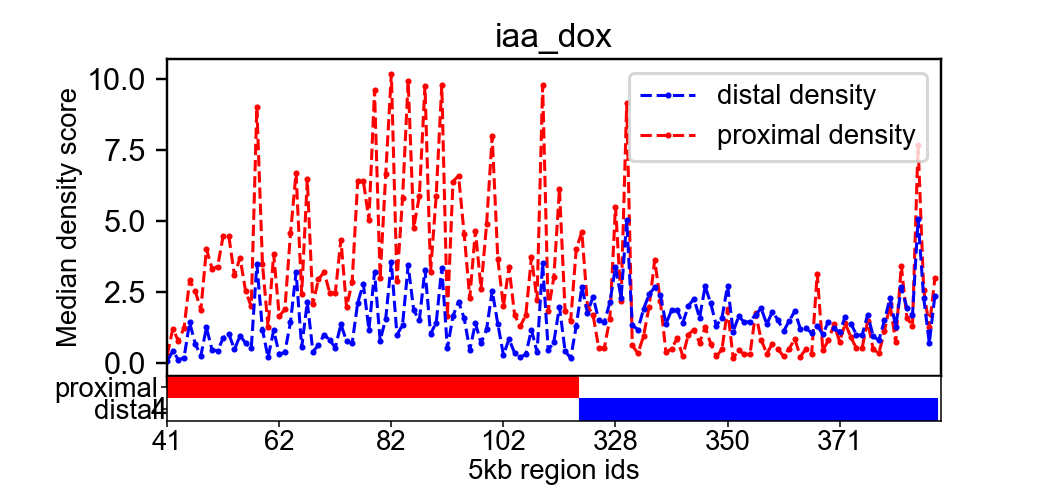

In [110]:
# Calculate mean proximal, distal density
mean_proximal_scores = np.nanmedian([_s['proximal'] for _s in iaa_dox_density_dicts], axis=0)
mean_distal_scores = np.nanmedian([_s['distal'] for _s in iaa_dox_density_dicts], axis=0)

# Plot
fig = plt.figure(figsize=(_double_col_width, _single_col_width),dpi=200)
grid = plt.GridSpec(2, 1, height_ratios=[7,1], hspace=0., wspace=0.2)

main_ax = plt.subplot(grid[0], xticklabels=[])

main_ax.plot(mean_proximal_scores, 'r.--', label='proximal density', markersize=2, linewidth=1)
main_ax.plot(mean_distal_scores, 'b.--', label='distal density', markersize=2, linewidth=1)
main_ax.set_ylabel(f"Median density score", fontsize=_font_size, labelpad=1)

main_ax.set_title('iaa_dox', fontsize=_font_size+2, pad=4)


handles, labels = main_ax.get_legend_handles_labels()
main_ax.legend(handles[::-1], labels[::-1], fontsize=_font_size, loc='upper right')
main_ax.set_xlim(0,len(mean_proximal_scores))

comp_ax = plt.subplot(grid[1], xticklabels=[], sharex=main_ax)
comp_ax.eventplot([segment_dict['proximal'], segment_dict['distal']], lineoffsets=[0.5,-0.5],linelengths=1, linewidths=2,
                   colors=np.array([[1, 0, 0],[0, 0, 1]]))
comp_ax.tick_params('both', labelsize=_font_size, 
                    width=_ticklabel_width, length=_ticklabel_size,
                    pad=1, labelbottom=True) # remove bottom ticklabels for ax1
[i[1].set_linewidth(_ticklabel_width) for i in comp_ax.spines.items()]

comp_ax.set_yticks([0.5,-0.5])
comp_ax.set_yticklabels(["proximal","distal"])
comp_ax.set_ylim([-1,1])

_ticks = np.arange(0, len(iaa_dox_reg_ids), 20)
comp_ax.set_xticks(_ticks)
comp_ax.set_xticklabels(iaa_dox_reg_ids[_ticks])
comp_ax.set_xlabel(f'5kb region ids', fontsize=_font_size, labelpad=1)

plt.gcf().subplots_adjust(bottom=0.15, left=0.16)
save_file = os.path.join(save_fig_folder, f'iaa_dox_density.png')
plt.savefig(save_file, transparent=True)
plt.show()

In [111]:
iaa_dox_separations = [separation_score(_density_dict, 'proximal', 'distal', segment_dict) 
                    for _density_dict in tqdm(iaa_dox_density_dicts)]
randomized_iaa_dox_separations = [separation_score(_density_dict, 'proximal', 'distal', 
                                                randomize_AB_dict(segment_dict, 'proximal', 'distal')) 
                               for _density_dict in tqdm(iaa_dox_density_dicts)]


fig, ax = plt.subplots(figsize=(_single_col_width, _single_col_width), dpi=200)
ax.hist(iaa_dox_separations, 100, #range=(0,1000), 
        density=True,  color=[1,0.5,0],
        alpha=0.7, label=f'iaa_dox separation, median={np.nanmedian(iaa_dox_separations):.2f}')
ax.hist(randomized_iaa_dox_separations, 100, #range=(0,1000), 
        density=True,  color=[0.3,0.4,0.4],
        alpha=0.7, label=f'randomized control, median={np.nanmedian(randomized_iaa_dox_separations):.2f}')

ax.tick_params('both', labelsize=_font_size-1, 
                width=_ticklabel_width, length=_ticklabel_size-1,
                pad=1, labelleft=True) # remove bottom ticklabels for ax
[i[1].set_linewidth(_ticklabel_width) for i in ax.spines.items()]

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(fontsize=_font_size-2)
ax.set_xlabel("Separation Score", labelpad=1, fontsize=_font_size)
ax.set_ylabel("Probability density", labelpad=1, fontsize=_font_size)
plt.gcf().subplots_adjust(bottom=0.15, left=0.16)
save_file = os.path.join(save_fig_folder, f'iaa_dox_separation.png')
plt.savefig(save_file, transparent=True)
plt.show()

<ipython-input-57-fe024a967494>:17: RuntimeWarning: Mean of empty slice
  _frac_b = 1-np.nanmean(_id_vector[np.where(_den_b >= _th_b)[0]])
<ipython-input-57-fe024a967494>:16: RuntimeWarning: Mean of empty slice
  _frac_a = np.nanmean(_id_vector[np.where(_den_a >= _th_a)[0]])


<IPython.core.display.Javascript object>

# DMSO

In [112]:
dmso_data = pickle.load(open(r'\\10.245.74.212\Chromatin_NAS_2\IgH_analyzed_results\20210326_IgH_proB_DMSO\Picked_spots_fov_3-22.pkl','rb'))

In [113]:
from scipy.spatial.distance import pdist, squareform
distmaps = np.array([squareform(pdist(_hzxys[:,1:4])) for _hzxys in dmso_data['hzxys']])
median_distmap = np.nanmedian(distmaps, axis=0)
loss_rates = np.mean(np.sum(np.isnan(dmso_data['hzxys']), axis=2)>0, axis=0)

In [115]:
dmso_reg_ids = np.array([ 41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,
        54,  55,  56,  57,  59,  60,  61,  62,  63,  64,  65,  66,  67,
        68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,
        81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,
        94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106,
       107, 108, 109, 110, 111, 112, 113, 114, 115, 321, 323, 324, 325,
       326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 337, 339, 340,
       341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353,
       354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366,
       367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 379, 380,
       381, 382, 383, 384, 386, 387, 388, 389, 390, 391, 392, 393, 394,
       395])

v_unit_2_inds = {_k: list(dmso_reg_ids).index(_v) for _k, _v in feature_2_reg_id.items() if 'Ighv' in _k}
d_unit_2_inds = {_k: list(dmso_reg_ids).index(_v) for _k, _v in feature_2_reg_id.items() if 'Ighd' in _k}
j_unit_2_inds = {_k: list(dmso_reg_ids).index(_v) for _k, _v in feature_2_reg_id.items() if 'Ighj' in _k}

<IPython.core.display.Javascript object>


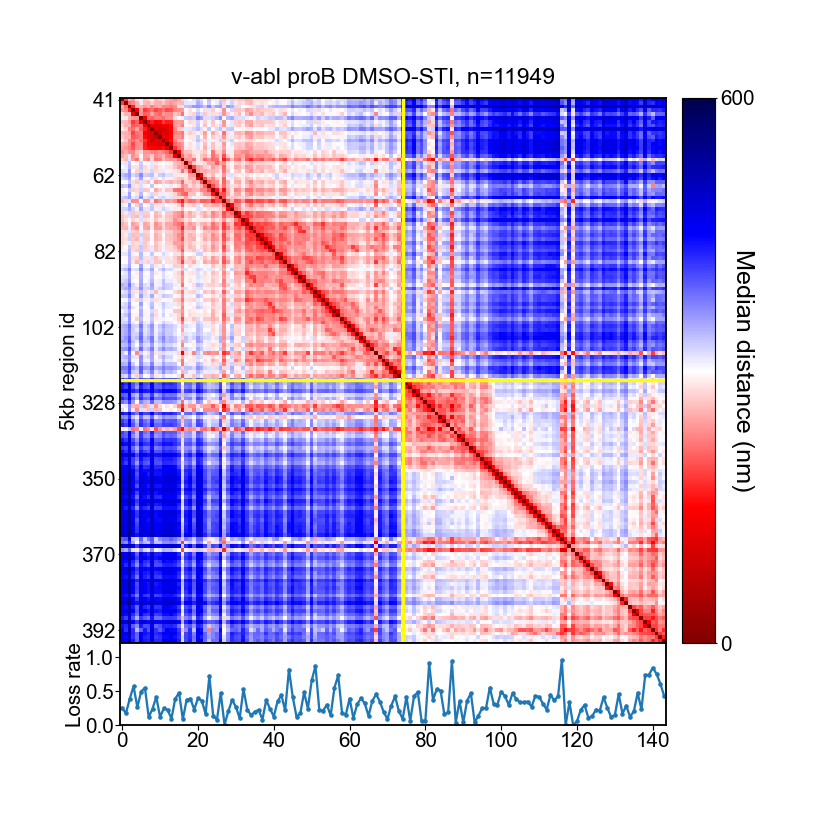

<ipython-input-116-bddf234e00af>:59: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("seismic"))
  contact_cmap.set_bad(color=[0.,0.,0.,1])


<IPython.core.display.Javascript object>


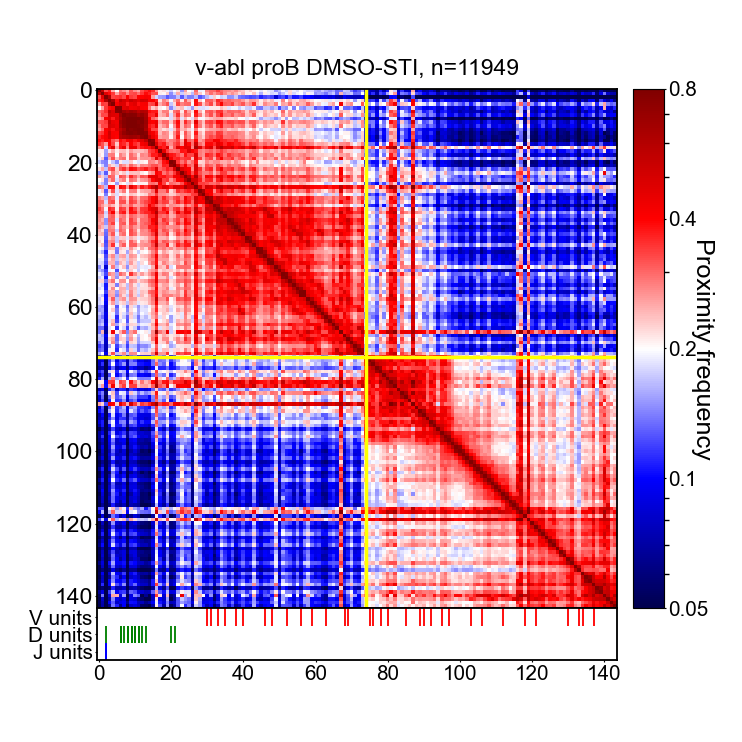

<ipython-input-116-bddf234e00af>:68: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  _pf = ax1.imshow(contact_map, cmap=contact_cmap, norm=contact_norm,vmin=contact_limits[0],


In [116]:
# Required plotting parameters
from ImageAnalysis3.figure_tools import _dpi,_single_col_width,_double_col_width,_single_row_height,_ref_bar_length, _ticklabel_size,_ticklabel_width
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib
from matplotlib.colors import LogNorm
_font_size = 9

fig, ax1 = plt.subplots(figsize=(_single_col_width*2, _single_col_width*2), dpi=150, )

ax1.set_title(f"v-abl proB DMSO-STI, n={len(distmaps)}", fontsize=10)
_pf = ax1.imshow(median_distmap, cmap='seismic_r', vmin=0, vmax=600)
ax1.axvline(x=np.where(dmso_reg_ids>300)[0][0], color=[1,1,0])
ax1.axhline(y=np.where(dmso_reg_ids>300)[0][0], color=[1,1,0])
_ticks = np.arange(0, len(dmso_reg_ids), 20)
ax1.set_yticks(_ticks)
ax1.set_yticklabels(dmso_reg_ids[_ticks])
ax1.set_ylabel(f"5kb region id", fontsize=_font_size, labelpad=1)


ax1.tick_params('both', labelsize=_font_size, 
                width=_ticklabel_width, length=_ticklabel_size-1,
                pad=1, labelbottom=False) # remove bottom ticklabels for ax1
# locate ax1
divider = make_axes_locatable(ax1)
# colorbar ax
cax = divider.append_axes('right', size='6%', pad="3%")
cbar = plt.colorbar(_pf,cax=cax, ax=ax1, ticks=[0, 600])
cbar.ax.tick_params('both', labelsize=_font_size, 
                width=_ticklabel_width, length=_ticklabel_size-1,
                pad=1, labelleft=False) # remove bottom ticklabels for ax1
cbar.outline.set_linewidth(_ticklabel_width)
cbar.set_label('Median distance (nm)',
               fontsize=_font_size+2, labelpad=0, rotation=270)
# create bottom ax
bot_ax = divider.append_axes('bottom', size='15%', pad="0%", 
                             sharex=ax1, xticks=np.arange(0,len(median_distmap), 50), yticks=[0,0.5,1] )

bot_ax.plot(loss_rates, '.-', markersize=2, linewidth=1)
bot_ax.set_xticks(np.arange(0,len(median_distmap),20))
bot_ax.set_ylim([0,1.2])
bot_ax.set_ylabel(f"Loss rate", fontsize=9, labelpad=0)
bot_ax.tick_params('both', labelsize=_font_size, 
                   width=_ticklabel_width, length=_ticklabel_size,
                   pad=1, labelleft=True) # remove bottom ticklabels for ax1
plt.savefig(os.path.join(save_fig_folder, 'dmso_median_loss.png'), transparent=True)
plt.show()


from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib
from matplotlib.colors import LogNorm

_font_size = 9

contact_limits = [0.05, 0.8]
contact_norm = LogNorm(vmin=np.min(contact_limits), 
                       vmax=np.max(contact_limits))
contact_cmap = matplotlib.cm.get_cmap('seismic')
contact_cmap.set_bad(color=[0.,0.,0.,1])

contact_th = 200
contact_map = (distmaps < contact_th).sum(0) / (np.isnan(distmaps)==False).sum(0)

fig, ax1 = plt.subplots(figsize=(_single_col_width*2, _single_col_width*2), dpi=150, )
#_pf = ax1.imshow(median_distmap, cmap='seismic_r', vmin=0, vmax=600)
ax1.set_title(f"v-abl proB DMSO-STI, n={len(distmaps)}", fontsize=10)

_pf = ax1.imshow(contact_map, cmap=contact_cmap, norm=contact_norm,vmin=contact_limits[0],
                       vmax=contact_limits[1])

ax1.axvline(x=np.where(dmso_reg_ids>300)[0][0], color=[1,1,0])
ax1.axhline(y=np.where(dmso_reg_ids>300)[0][0], color=[1,1,0])
ax1.tick_params('both', labelsize=_font_size+1, 
                width=_ticklabel_width, length=_ticklabel_size-1,
                pad=1, labelbottom=False) # remove bottom ticklabels for ax1
# locate ax1
divider = make_axes_locatable(ax1)
# colorbar ax
cax = divider.append_axes('right', size='6%', pad="3%")
colorbar_ticks = [0.05, 0.1, 0.2, 0.4, 0.8]
cbar = plt.colorbar(_pf,cax=cax, ax=ax1, ticks=colorbar_ticks)
cbar.ax.set_yticklabels(colorbar_ticks)
cbar.ax.tick_params('both', labelsize=_font_size, 
                width=_ticklabel_width, length=_ticklabel_size-1,
                pad=1, labelleft=False) # remove bottom ticklabels for ax1
cbar.outline.set_linewidth(_ticklabel_width)
cbar.set_label('Proximity frequency',
               fontsize=_font_size+2, labelpad=2.5, rotation=270)
# create bottom ax
bot_ax = divider.append_axes('bottom', size='10%', pad="0%", 
                             sharex=ax1, xticks=np.arange(0,len(median_distmap), 20) )

bot_ax.eventplot(list(v_unit_2_inds.values()), lineoffsets=2.5, linewidths=0.8, colors='r')
bot_ax.eventplot(list(d_unit_2_inds.values()), lineoffsets=1.5, linewidths=0.8, colors='g')
bot_ax.eventplot(list(j_unit_2_inds.values()), lineoffsets=0.5, linewidths=0.8, colors='b')
bot_ax.set_ylim([0,3])
bot_ax.set_yticks([2.5,1.5, 0.5])
bot_ax.set_yticklabels(["V units", "D units", "J units"], fontsize=_font_size)
bot_ax.tick_params('both', labelsize=_font_size, 
                   width=_ticklabel_width, length=_ticklabel_size-1,
                   pad=1, labelleft=True) # remove bottom ticklabels for bot_ax
plt.savefig(os.path.join(save_fig_folder, 'dmso_proximity_vdj_feature.png'), transparent=True)
plt.show()

In [117]:
segment_dict = {'proximal':np.where(dmso_reg_ids<300)[0], 'distal':np.where(dmso_reg_ids>300)[0]}

# density for the entire chr
import multiprocessing as mp
num_threads=12
density_var = 75 # nm

_dna_density_args = [(_hzxys,_hzxys, segment_dict, [density_var,density_var,density_var], True) 
                     for _hzxys in dmso_data['hzxys']]
_dna_density_time = time.time()

print(f"Multiprocessing calculate dna_density_scores", end=' ')
with mp.Pool(num_threads) as dna_density_pool:
    dmso_density_dicts = dna_density_pool.starmap(spot_density_scores, _dna_density_args)
    dna_density_pool.close()
    dna_density_pool.join()
    dna_density_pool.terminate()
print(f"in {time.time()-_dna_density_time:.3f}s.")

Multiprocessing calculate dna_density_scores in 19.128s.


<IPython.core.display.Javascript object>


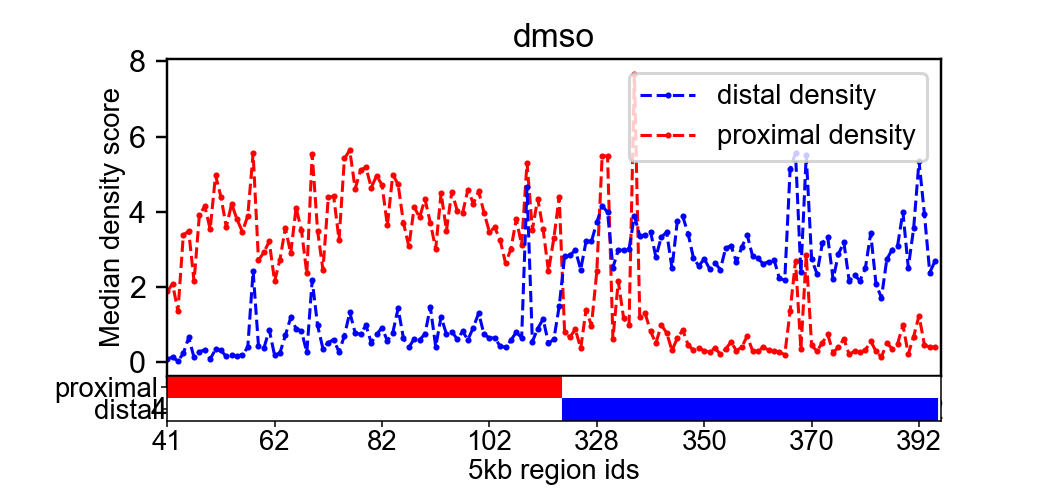

In [118]:
# Calculate mean proximal, distal density
mean_proximal_scores = np.nanmedian([_s['proximal'] for _s in dmso_density_dicts], axis=0)
mean_distal_scores = np.nanmedian([_s['distal'] for _s in dmso_density_dicts], axis=0)

# Plot
fig = plt.figure(figsize=(_double_col_width, _single_col_width),dpi=200)
grid = plt.GridSpec(2, 1, height_ratios=[7,1], hspace=0., wspace=0.2)

main_ax = plt.subplot(grid[0], xticklabels=[])

main_ax.plot(mean_proximal_scores, 'r.--', label='proximal density', markersize=2, linewidth=1)
main_ax.plot(mean_distal_scores, 'b.--', label='distal density', markersize=2, linewidth=1)
main_ax.set_ylabel(f"Median density score", fontsize=_font_size, labelpad=1)

main_ax.set_title('dmso', fontsize=_font_size+2, pad=4)


handles, labels = main_ax.get_legend_handles_labels()
main_ax.legend(handles[::-1], labels[::-1], fontsize=_font_size, loc='upper right')
main_ax.set_xlim(0,len(mean_proximal_scores))

comp_ax = plt.subplot(grid[1], xticklabels=[], sharex=main_ax)
comp_ax.eventplot([segment_dict['proximal'], segment_dict['distal']], lineoffsets=[0.5,-0.5],linelengths=1, linewidths=2,
                   colors=np.array([[1, 0, 0],[0, 0, 1]]))
comp_ax.tick_params('both', labelsize=_font_size, 
                    width=_ticklabel_width, length=_ticklabel_size,
                    pad=1, labelbottom=True) # remove bottom ticklabels for ax1
[i[1].set_linewidth(_ticklabel_width) for i in comp_ax.spines.items()]

comp_ax.set_yticks([0.5,-0.5])
comp_ax.set_yticklabels(["proximal","distal"])
comp_ax.set_ylim([-1,1])

_ticks = np.arange(0, len(dmso_reg_ids), 20)
comp_ax.set_xticks(_ticks)
comp_ax.set_xticklabels(dmso_reg_ids[_ticks])
comp_ax.set_xlabel(f'5kb region ids', fontsize=_font_size, labelpad=1)

plt.gcf().subplots_adjust(bottom=0.15, left=0.16)
save_file = os.path.join(save_fig_folder, f'dmso_density.png')
plt.savefig(save_file, transparent=True)
plt.show()

<ipython-input-57-fe024a967494>:16: RuntimeWarning: Mean of empty slice
  _frac_a = np.nanmean(_id_vector[np.where(_den_a >= _th_a)[0]])
<ipython-input-57-fe024a967494>:17: RuntimeWarning: Mean of empty slice
  _frac_b = 1-np.nanmean(_id_vector[np.where(_den_b >= _th_b)[0]])


<IPython.core.display.Javascript object>


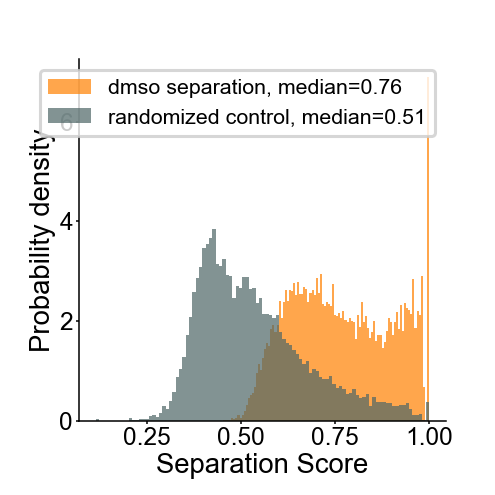

In [119]:
dmso_separations = [separation_score(_density_dict, 'proximal', 'distal', segment_dict) 
                    for _density_dict in tqdm(dmso_density_dicts)]
randomized_dmso_separations = [separation_score(_density_dict, 'proximal', 'distal', 
                                                randomize_AB_dict(segment_dict, 'proximal', 'distal')) 
                               for _density_dict in tqdm(dmso_density_dicts)]


fig, ax = plt.subplots(figsize=(_single_col_width, _single_col_width), dpi=200)
ax.hist(dmso_separations, 100, #range=(0,1000), 
        density=True,  color=[1,0.5,0],
        alpha=0.7, label=f'dmso separation, median={np.nanmedian(dmso_separations):.2f}')
ax.hist(randomized_dmso_separations, 100, #range=(0,1000), 
        density=True,  color=[0.3,0.4,0.4],
        alpha=0.7, label=f'randomized control, median={np.nanmedian(randomized_dmso_separations):.2f}')

ax.tick_params('both', labelsize=_font_size-1, 
                width=_ticklabel_width, length=_ticklabel_size-1,
                pad=1, labelleft=True) # remove bottom ticklabels for ax
[i[1].set_linewidth(_ticklabel_width) for i in ax.spines.items()]

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(fontsize=_font_size-2)
ax.set_xlabel("Separation Score", labelpad=1, fontsize=_font_size)
ax.set_ylabel("Probability density", labelpad=1, fontsize=_font_size)
plt.gcf().subplots_adjust(bottom=0.15, left=0.16)
save_file = os.path.join(save_fig_folder, f'dmso_separation.png')
plt.savefig(save_file, transparent=True)
plt.show()

# try to do the same analysis for another copy of iaa dox

# iaa dox

In [138]:
from scipy.spatial.distance import pdist, squareform
iaa_dox_rep_data = pickle.load(open(r'\\10.245.74.212\Chromatin_NAS_2\IgH_analyzed_results\20200807-proB_iaa_dox+\Picked_spots_fov_3-12.pkl','rb'))

distmaps = np.array([squareform(pdist(_hzxys[:,1:4])) for _hzxys in iaa_dox_rep_data['hzxys']])
median_distmap = np.nanmedian(distmaps, axis=0)
loss_rates = np.mean(np.sum(np.isnan(iaa_dox_rep_data['hzxys']), axis=2)>0, axis=0)

In [147]:
iaa_dox_rep_reg_ids = np.array([ 41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,
        54,  55,  56,  57,  59,  60,  61,  62,  63,  64,  65,  66,  67,
        68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,
        81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,
        94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106,
       107, 108, 109, 110, 111, 112, 113, 114, 115, 321, 323, 324, 325,
       326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 337, 339, 340,
       341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353,
       354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366,
       367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 379, 380,
       381, 382, 383, 384, 386, 387, 388, 389, 390, 391, 392, 393, 394,
       395])

v_unit_2_inds = {_k: list(iaa_dox_rep_reg_ids).index(_v) for _k, _v in feature_2_reg_id.items() if 'Ighv' in _k}
d_unit_2_inds = {_k: list(iaa_dox_rep_reg_ids).index(_v) for _k, _v in feature_2_reg_id.items() if 'Ighd' in _k}
j_unit_2_inds = {_k: list(iaa_dox_rep_reg_ids).index(_v) for _k, _v in feature_2_reg_id.items() if 'Ighj' in _k}

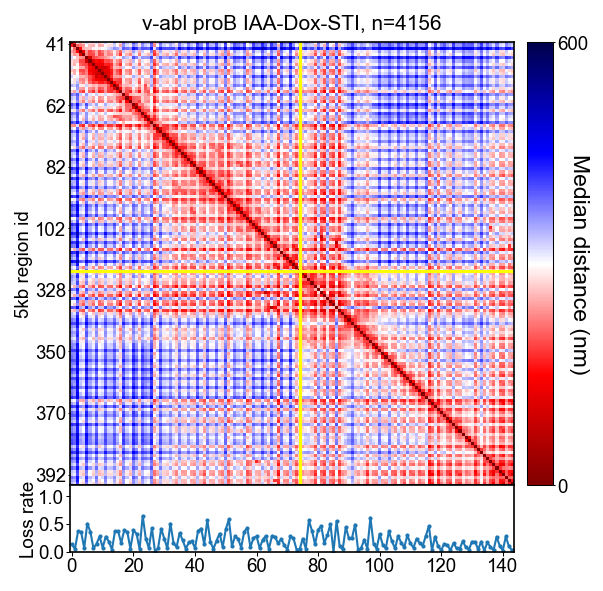

<ipython-input-150-8ba223dd93d7>:59: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("seismic"))
  contact_cmap.set_bad(color=[0.,0.,0.,1])
<ipython-input-150-8ba223dd93d7>:68: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  _pf = ax1.imshow(contact_map, cmap=contact_cmap, norm=contact_norm,vmin=contact_limits[0],


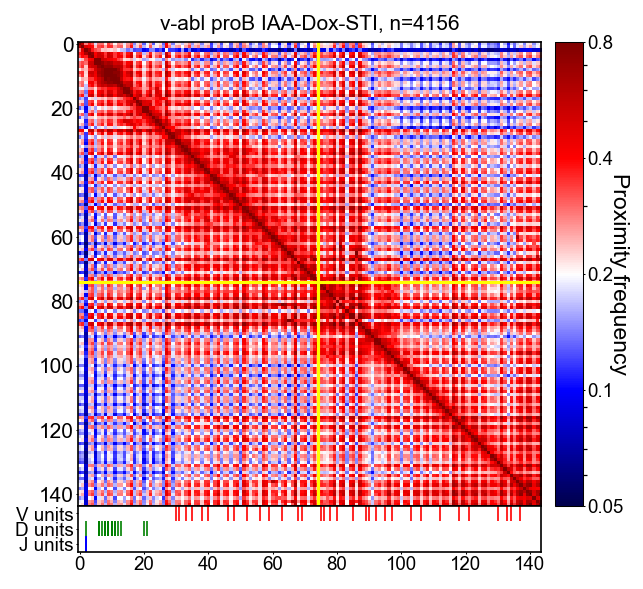

In [150]:
# Required plotting parameters
from ImageAnalysis3.figure_tools import _dpi,_single_col_width,_double_col_width,_single_row_height,_ref_bar_length, _ticklabel_size,_ticklabel_width
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib
from matplotlib.colors import LogNorm
_font_size = 9

fig, ax1 = plt.subplots(figsize=(_single_col_width*2, _single_col_width*2), dpi=150, )

ax1.set_title(f"v-abl proB IAA-Dox-STI, n={len(distmaps)}", fontsize=10)
_pf = ax1.imshow(median_distmap, cmap='seismic_r', vmin=0, vmax=600)
ax1.axvline(x=np.where(iaa_dox_rep_reg_ids>300)[0][0], color=[1,1,0])
ax1.axhline(y=np.where(iaa_dox_rep_reg_ids>300)[0][0], color=[1,1,0])
_ticks = np.arange(0, len(iaa_dox_rep_reg_ids), 20)
ax1.set_yticks(_ticks)
ax1.set_yticklabels(iaa_dox_rep_reg_ids[_ticks])
ax1.set_ylabel(f"5kb region id", fontsize=_font_size, labelpad=1)


ax1.tick_params('both', labelsize=_font_size, 
                width=_ticklabel_width, length=_ticklabel_size-1,
                pad=1, labelbottom=False) # remove bottom ticklabels for ax1
# locate ax1
divider = make_axes_locatable(ax1)
# colorbar ax
cax = divider.append_axes('right', size='6%', pad="3%")
cbar = plt.colorbar(_pf,cax=cax, ax=ax1, ticks=[0, 600])
cbar.ax.tick_params('both', labelsize=_font_size, 
                width=_ticklabel_width, length=_ticklabel_size-1,
                pad=1, labelleft=False) # remove bottom ticklabels for ax1
cbar.outline.set_linewidth(_ticklabel_width)
cbar.set_label('Median distance (nm)',
               fontsize=_font_size+2, labelpad=0, rotation=270)
# create bottom ax
bot_ax = divider.append_axes('bottom', size='15%', pad="0%", 
                             sharex=ax1, xticks=np.arange(0,len(median_distmap), 50), yticks=[0,0.5,1] )

bot_ax.plot(loss_rates, '.-', markersize=2, linewidth=1)
bot_ax.set_xticks(np.arange(0,len(median_distmap),20))
bot_ax.set_ylim([0,1.2])
bot_ax.set_ylabel(f"Loss rate", fontsize=9, labelpad=0)
bot_ax.tick_params('both', labelsize=_font_size, 
                   width=_ticklabel_width, length=_ticklabel_size,
                   pad=1, labelleft=True) # remove bottom ticklabels for ax1
plt.savefig(os.path.join(save_fig_folder, 'iaa_dox_rep_median_loss.png'), transparent=True)
plt.show()


from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib
from matplotlib.colors import LogNorm

_font_size = 9

contact_limits = [0.05, 0.8]
contact_norm = LogNorm(vmin=np.min(contact_limits), 
                       vmax=np.max(contact_limits))
contact_cmap = matplotlib.cm.get_cmap('seismic')
contact_cmap.set_bad(color=[0.,0.,0.,1])

contact_th = 200
contact_map = (distmaps < contact_th).sum(0) / (np.isnan(distmaps)==False).sum(0)

fig, ax1 = plt.subplots(figsize=(_single_col_width*2, _single_col_width*2), dpi=150, )
#_pf = ax1.imshow(median_distmap, cmap='seismic_r', vmin=0, vmax=600)
ax1.set_title(f"v-abl proB IAA-Dox-STI, n={len(distmaps)}", fontsize=10)

_pf = ax1.imshow(contact_map, cmap=contact_cmap, norm=contact_norm,vmin=contact_limits[0],
                       vmax=contact_limits[1])

ax1.axvline(x=np.where(iaa_dox_rep_reg_ids>300)[0][0], color=[1,1,0])
ax1.axhline(y=np.where(iaa_dox_rep_reg_ids>300)[0][0], color=[1,1,0])
ax1.tick_params('both', labelsize=_font_size+1, 
                width=_ticklabel_width, length=_ticklabel_size-1,
                pad=1, labelbottom=False) # remove bottom ticklabels for ax1
# locate ax1
divider = make_axes_locatable(ax1)
# colorbar ax
cax = divider.append_axes('right', size='6%', pad="3%")
colorbar_ticks = [0.05, 0.1, 0.2, 0.4, 0.8]
cbar = plt.colorbar(_pf,cax=cax, ax=ax1, ticks=colorbar_ticks)
cbar.ax.set_yticklabels(colorbar_ticks)
cbar.ax.tick_params('both', labelsize=_font_size, 
                width=_ticklabel_width, length=_ticklabel_size-1,
                pad=1, labelleft=False) # remove bottom ticklabels for ax1
cbar.outline.set_linewidth(_ticklabel_width)
cbar.set_label('Proximity frequency',
               fontsize=_font_size+2, labelpad=2.5, rotation=270)
# create bottom ax
bot_ax = divider.append_axes('bottom', size='10%', pad="0%", 
                             sharex=ax1, xticks=np.arange(0,len(median_distmap), 20) )

bot_ax.eventplot(list(v_unit_2_inds.values()), lineoffsets=2.5, linewidths=0.8, colors='r')
bot_ax.eventplot(list(d_unit_2_inds.values()), lineoffsets=1.5, linewidths=0.8, colors='g')
bot_ax.eventplot(list(j_unit_2_inds.values()), lineoffsets=0.5, linewidths=0.8, colors='b')
bot_ax.set_ylim([0,3])
bot_ax.set_yticks([2.5,1.5, 0.5])
bot_ax.set_yticklabels(["V units", "D units", "J units"], fontsize=_font_size)
bot_ax.tick_params('both', labelsize=_font_size, 
                   width=_ticklabel_width, length=_ticklabel_size-1,
                   pad=1, labelleft=True) # remove bottom ticklabels for bot_ax
plt.savefig(os.path.join(save_fig_folder, 'iaa_dox_rep_proximity_vdj_feature.png'), transparent=True)
plt.show()

In [151]:
segment_dict = {'proximal':np.where(iaa_dox_rep_reg_ids<300)[0], 'distal':np.where(iaa_dox_rep_reg_ids>300)[0]}

# density for the entire chr
import multiprocessing as mp
num_threads=12
density_var = 75 # nm

_dna_density_args = [(_hzxys,_hzxys, segment_dict, [density_var,density_var,density_var], True) 
                     for _hzxys in iaa_dox_rep_data['hzxys']]
_dna_density_time = time.time()

print(f"Multiprocessing calculate dna_density_scores", end=' ')
with mp.Pool(num_threads) as dna_density_pool:
    iaa_dox_rep_density_dicts = dna_density_pool.starmap(spot_density_scores, _dna_density_args)
    dna_density_pool.close()
    dna_density_pool.join()
    dna_density_pool.terminate()
print(f"in {time.time()-_dna_density_time:.3f}s.")

Multiprocessing calculate dna_density_scores in 10.268s.


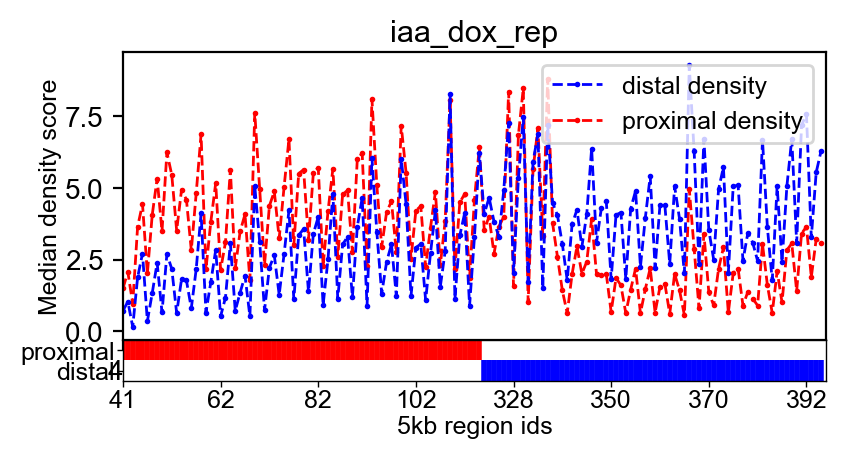

In [152]:
# Calculate mean proximal, distal density
mean_proximal_scores = np.nanmedian([_s['proximal'] for _s in iaa_dox_rep_density_dicts], axis=0)
mean_distal_scores = np.nanmedian([_s['distal'] for _s in iaa_dox_rep_density_dicts], axis=0)

# Plot
fig = plt.figure(figsize=(_double_col_width, _single_col_width),dpi=200)
grid = plt.GridSpec(2, 1, height_ratios=[7,1], hspace=0., wspace=0.2)

main_ax = plt.subplot(grid[0], xticklabels=[])

main_ax.plot(mean_proximal_scores, 'r.--', label='proximal density', markersize=2, linewidth=1)
main_ax.plot(mean_distal_scores, 'b.--', label='distal density', markersize=2, linewidth=1)
main_ax.set_ylabel(f"Median density score", fontsize=_font_size, labelpad=1)

main_ax.set_title('iaa_dox_rep', fontsize=_font_size+2, pad=4)


handles, labels = main_ax.get_legend_handles_labels()
main_ax.legend(handles[::-1], labels[::-1], fontsize=_font_size, loc='upper right')
main_ax.set_xlim(0,len(mean_proximal_scores))

comp_ax = plt.subplot(grid[1], xticklabels=[], sharex=main_ax)
comp_ax.eventplot([segment_dict['proximal'], segment_dict['distal']], lineoffsets=[0.5,-0.5],linelengths=1, linewidths=2,
                   colors=np.array([[1, 0, 0],[0, 0, 1]]))
comp_ax.tick_params('both', labelsize=_font_size, 
                    width=_ticklabel_width, length=_ticklabel_size,
                    pad=1, labelbottom=True) # remove bottom ticklabels for ax1
[i[1].set_linewidth(_ticklabel_width) for i in comp_ax.spines.items()]

comp_ax.set_yticks([0.5,-0.5])
comp_ax.set_yticklabels(["proximal","distal"])
comp_ax.set_ylim([-1,1])

_ticks = np.arange(0, len(iaa_dox_rep_reg_ids), 20)
comp_ax.set_xticks(_ticks)
comp_ax.set_xticklabels(iaa_dox_rep_reg_ids[_ticks])
comp_ax.set_xlabel(f'5kb region ids', fontsize=_font_size, labelpad=1)

plt.gcf().subplots_adjust(bottom=0.15, left=0.16)
save_file = os.path.join(save_fig_folder, f'iaa_dox_rep_density.png')
plt.savefig(save_file, transparent=True)
plt.show()

<ipython-input-57-fe024a967494>:16: RuntimeWarning: Mean of empty slice
  _frac_a = np.nanmean(_id_vector[np.where(_den_a >= _th_a)[0]])


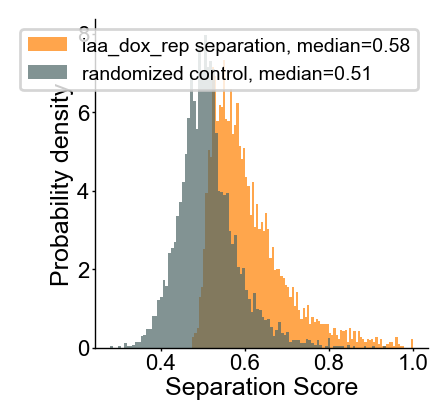

In [153]:
iaa_dox_rep_separations = [separation_score(_density_dict, 'proximal', 'distal', segment_dict) 
                    for _density_dict in tqdm(iaa_dox_rep_density_dicts)]
randomized_iaa_dox_rep_separations = [separation_score(_density_dict, 'proximal', 'distal', 
                                                randomize_AB_dict(segment_dict, 'proximal', 'distal')) 
                               for _density_dict in tqdm(iaa_dox_rep_density_dicts)]


fig, ax = plt.subplots(figsize=(_single_col_width, _single_col_width), dpi=200)
ax.hist(iaa_dox_rep_separations, 100, #range=(0,1000), 
        density=True,  color=[1,0.5,0],
        alpha=0.7, label=f'iaa_dox_rep separation, median={np.nanmedian(iaa_dox_rep_separations):.2f}')
ax.hist(randomized_iaa_dox_rep_separations, 100, #range=(0,1000), 
        density=True,  color=[0.3,0.4,0.4],
        alpha=0.7, label=f'randomized control, median={np.nanmedian(randomized_iaa_dox_rep_separations):.2f}')

ax.tick_params('both', labelsize=_font_size-1, 
                width=_ticklabel_width, length=_ticklabel_size-1,
                pad=1, labelleft=True) # remove bottom ticklabels for ax
[i[1].set_linewidth(_ticklabel_width) for i in ax.spines.items()]

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(fontsize=_font_size-2)
ax.set_xlabel("Separation Score", labelpad=1, fontsize=_font_size)
ax.set_ylabel("Probability density", labelpad=1, fontsize=_font_size)
plt.gcf().subplots_adjust(bottom=0.15, left=0.16)
save_file = os.path.join(save_fig_folder, f'iaa_dox_rep_separation.png')
plt.savefig(save_file, transparent=True)
plt.show()

# Radius of gyration

In [155]:
from ImageAnalysis3.spot_tools.scoring import radius_of_gyration

bone_marrow_rgs = [radius_of_gyration(_hzxy[:,1:]) for _hzxy in bone_marrow_data['hzxys']]
iaa_dox_rgs = [radius_of_gyration(_hzxy[:,1:]) for _hzxy in iaa_dox_data['hzxys']]
iaa_dox_rep_rgs = [radius_of_gyration(_hzxy[:,1:]) for _hzxy in iaa_dox_rep_data['hzxys']]
dmso_rgs = [radius_of_gyration(_hzxy[:,1:]) for _hzxy in dmso_data['hzxys']]


X:\IgH_analyzed_results\IgH_results\v2\v2\v2\v2\RG_combined.png


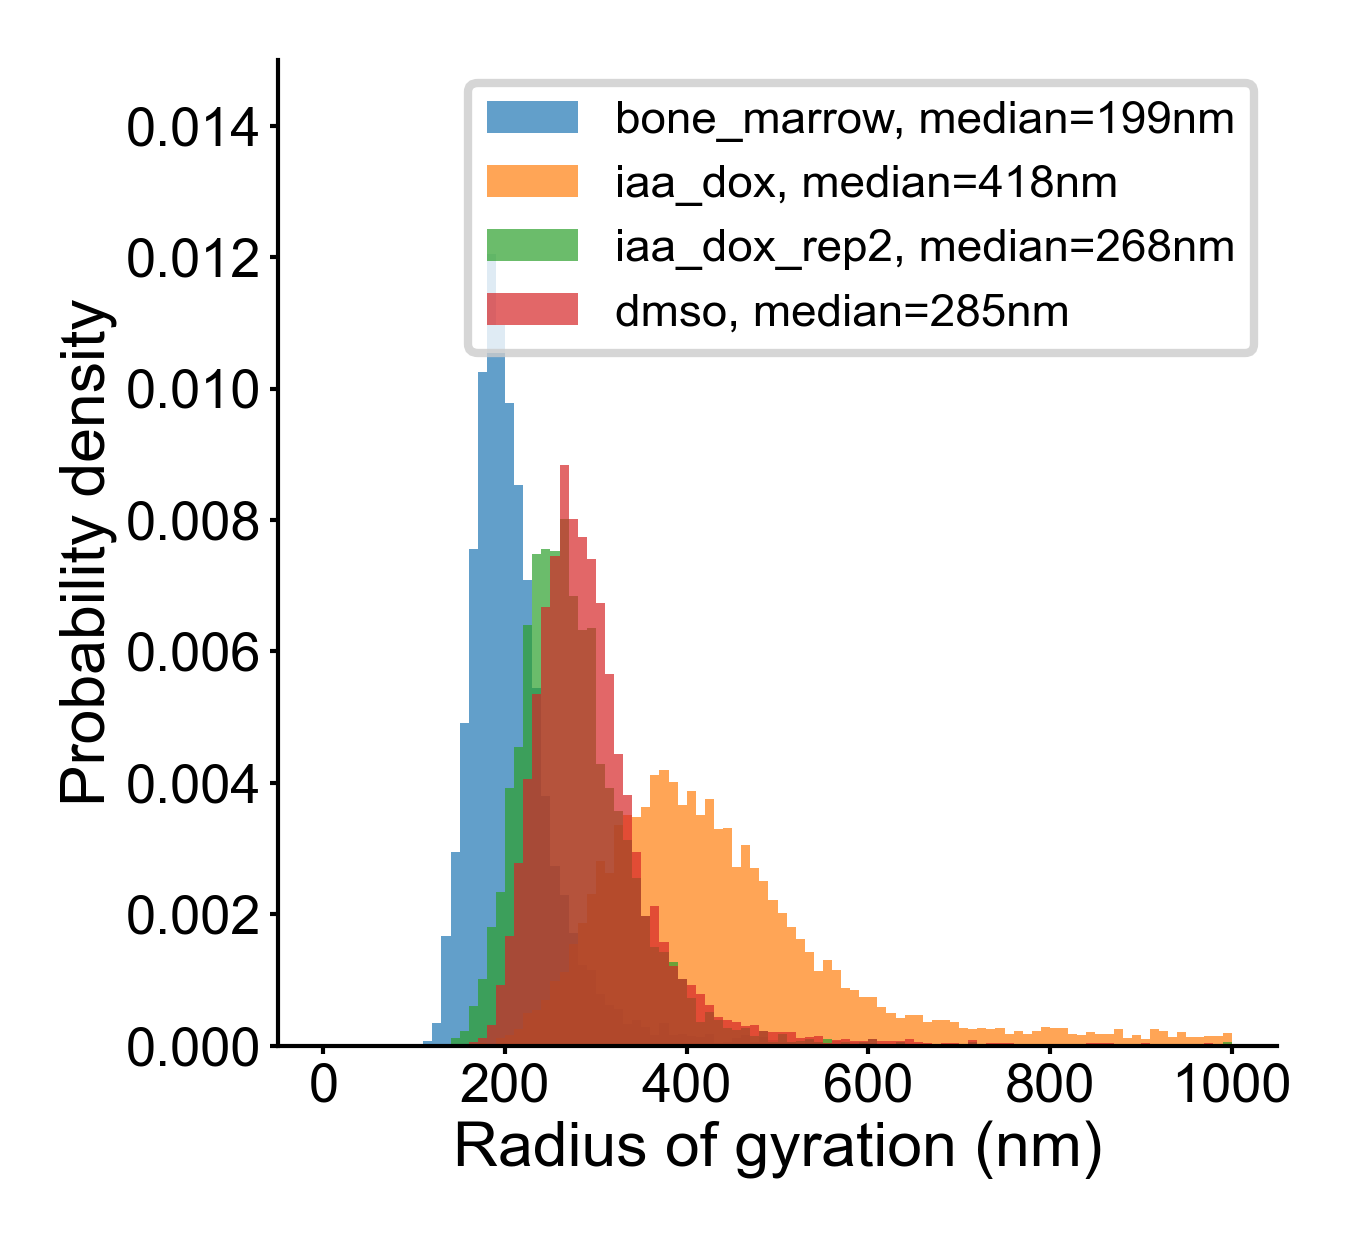

In [156]:
_font_size=7.5
fig, ax = plt.subplots(figsize=(_single_col_width, _single_col_width), dpi=600)
ax.hist(bone_marrow_rgs, 100, range=(0,1000), 
        density=True,  
        alpha=0.7, label=f'bone_marrow, median={np.nanmedian(bone_marrow_rgs):.0f}nm')
ax.hist(iaa_dox_rgs, 100, range=(0,1000), 
        density=True,  
        alpha=0.7, label=f'iaa_dox, median={np.nanmedian(iaa_dox_rgs):.0f}nm')
ax.hist(iaa_dox_rep_rgs, 100, range=(0,1000), 
        density=True,  
        alpha=0.7, label=f'iaa_dox_rep2, median={np.nanmedian(iaa_dox_rep_rgs):.0f}nm')
ax.hist(dmso_rgs, 100, range=(0,1000), 
        density=True,  
        alpha=0.7, label=f'dmso, median={np.nanmedian(dmso_rgs):.0f}nm')

ax.tick_params('both', labelsize=_font_size-1, 
                width=_ticklabel_width, length=_ticklabel_size-1,
                pad=1, labelleft=True) # remove bottom ticklabels for ax
[i[1].set_linewidth(_ticklabel_width) for i in ax.spines.items()]

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(fontsize=_font_size-2)
ax.set_xlabel("Radius of gyration (nm)", labelpad=1, fontsize=_font_size)
ax.set_ylabel("Probability density", labelpad=1, fontsize=_font_size)
ax.set_ylim([0,0.015])
plt.gcf().subplots_adjust(bottom=0.15, left=0.16)
save_file = os.path.join(save_fig_folder, f'RG_combined.png')
plt.savefig(save_file, transparent=True)
print(save_file)
plt.show()

## proximal

In [157]:
iaa_dox_p_rgs = np.array([radius_of_gyration(_hzxy[np.where(iaa_dox_reg_ids < 300)[0],1:]) 
                          for _hzxy in iaa_dox_data['hzxys']])
iaa_dox_rep_p_rgs = np.array([radius_of_gyration(_hzxy[np.where(iaa_dox_rep_reg_ids < 300)[0],1:]) 
                          for _hzxy in iaa_dox_rep_data['hzxys']])
bone_marrow_p_rgs = np.array([radius_of_gyration(_hzxy[np.where(bone_marrow_reg_ids < 300)[0],1:]) 
                              for _hzxy in bone_marrow_data['hzxys']])
dmso_p_rgs = np.array([radius_of_gyration(_hzxy[np.where(dmso_reg_ids < 300)[0],1:]) 
                       for _hzxy in dmso_data['hzxys']])

E:\Users\puzheng\Documents\ImageAnalysis3\spot_tools\scoring.py:416: RuntimeWarning: Mean of empty slice
  _rs = np.linalg.norm(zxys - np.nanmean(zxys, axis=0), axis=1)
E:\Users\puzheng\Documents\ImageAnalysis3\spot_tools\scoring.py:418: RuntimeWarning: Mean of empty slice
  _rg = np.sqrt(np.nanmean(_rs**2))


X:\IgH_analyzed_results\IgH_results\v2\v2\v2\v2\RG_combined_proximal.png


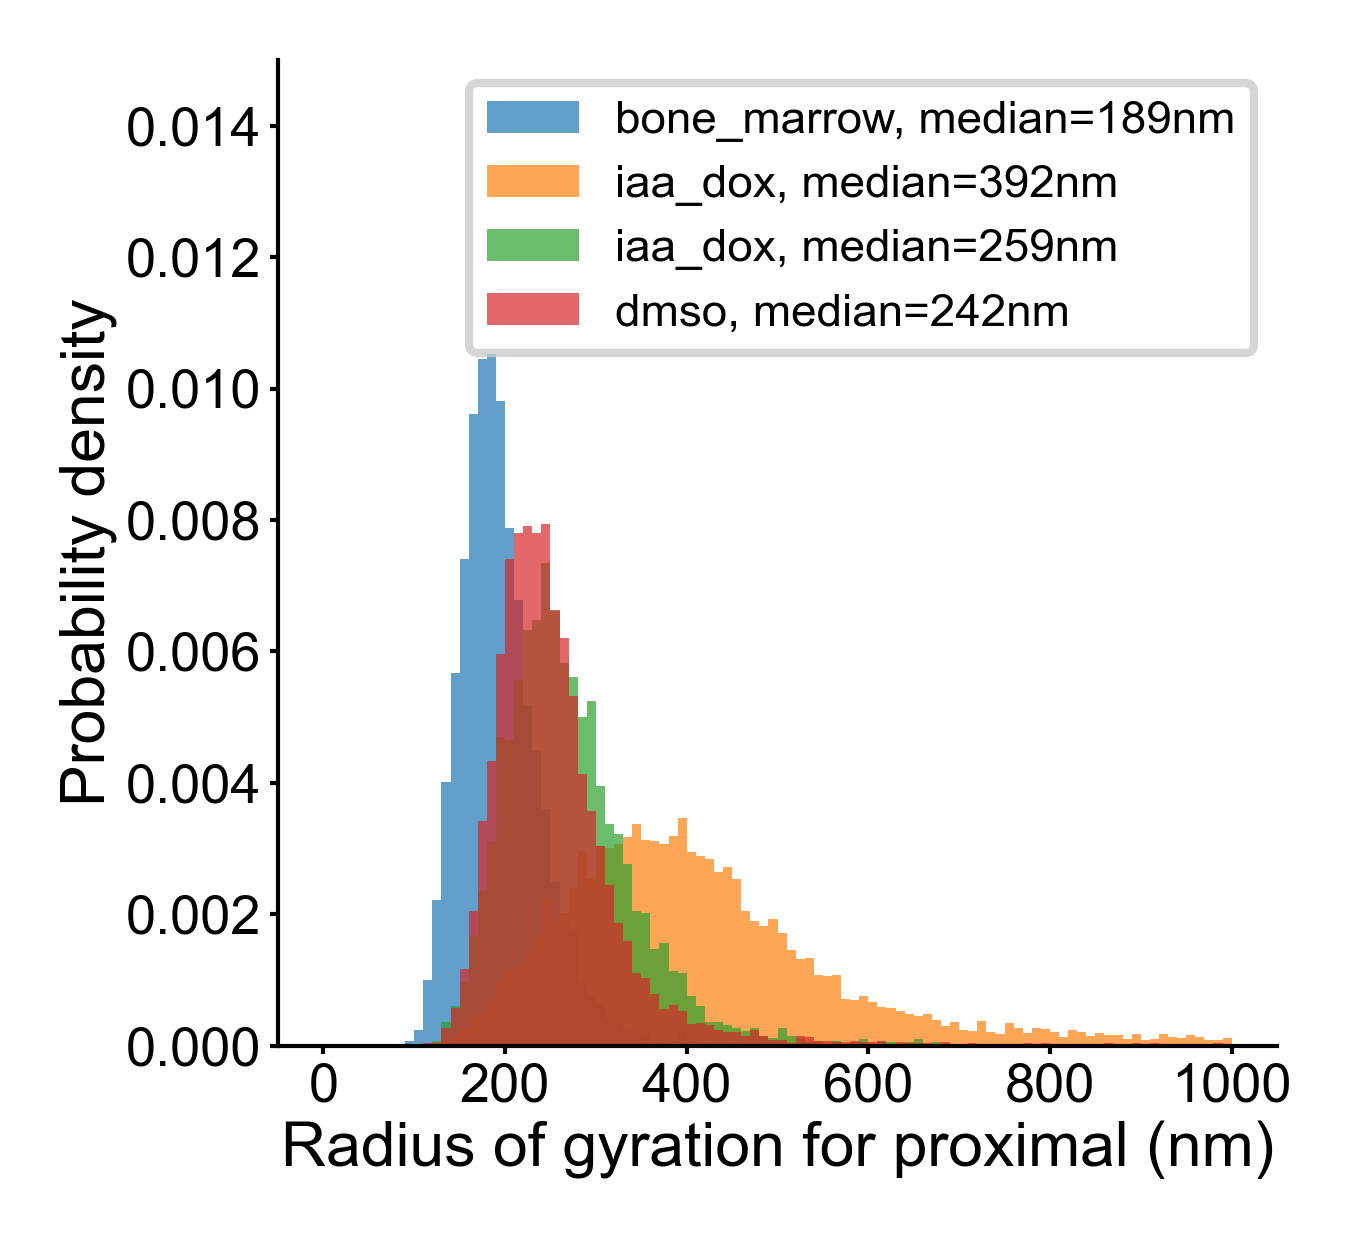

In [158]:
_font_size=7.5
fig, ax = plt.subplots(figsize=(_single_col_width, _single_col_width), dpi=600)
ax.hist(bone_marrow_p_rgs, 100, range=(0,1000), 
        density=True,  
        alpha=0.7, label=f'bone_marrow, median={np.nanmedian(bone_marrow_p_rgs):.0f}nm')
ax.hist(iaa_dox_p_rgs, 100, range=(0,1000), 
        density=True,  
        alpha=0.7, label=f'iaa_dox, median={np.nanmedian(iaa_dox_p_rgs):.0f}nm')
ax.hist(iaa_dox_rep_p_rgs, 100, range=(0,1000), 
        density=True,  
        alpha=0.7, label=f'iaa_dox, median={np.nanmedian(iaa_dox_rep_p_rgs):.0f}nm')
ax.hist(dmso_p_rgs, 100, range=(0,1000), 
        density=True,  
        alpha=0.7, label=f'dmso, median={np.nanmedian(dmso_p_rgs):.0f}nm')

ax.tick_params('both', labelsize=_font_size-1, 
                width=_ticklabel_width, length=_ticklabel_size-1,
                pad=1, labelleft=True) # remove bottom ticklabels for ax
[i[1].set_linewidth(_ticklabel_width) for i in ax.spines.items()]

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(fontsize=_font_size-2)
ax.set_xlabel("Radius of gyration for proximal (nm)", labelpad=1, fontsize=_font_size)
ax.set_ylabel("Probability density", labelpad=1, fontsize=_font_size)
ax.set_ylim([0,0.015])
plt.gcf().subplots_adjust(bottom=0.15, left=0.16)
save_file = os.path.join(save_fig_folder, f'RG_combined_proximal.png')
plt.savefig(save_file, transparent=True)
print(save_file)
plt.show()

## distal

In [159]:
iaa_dox_d_rgs = np.array([radius_of_gyration(_hzxy[np.where(iaa_dox_reg_ids > 300)[0],1:]) 
                          for _hzxy in iaa_dox_data['hzxys']])
iaa_dox_rep_d_rgs = np.array([radius_of_gyration(_hzxy[np.where(iaa_dox_rep_reg_ids > 300)[0],1:]) 
                          for _hzxy in iaa_dox_rep_data['hzxys']])
bone_marrow_d_rgs = np.array([radius_of_gyration(_hzxy[np.where(bone_marrow_reg_ids > 300)[0],1:]) 
                              for _hzxy in bone_marrow_data['hzxys']])
dmso_d_rgs = np.array([radius_of_gyration(_hzxy[np.where(dmso_reg_ids > 300)[0],1:]) 
                       for _hzxy in dmso_data['hzxys']])

X:\IgH_analyzed_results\IgH_results\v2\v2\v2\v2\RG_combined_distal.png


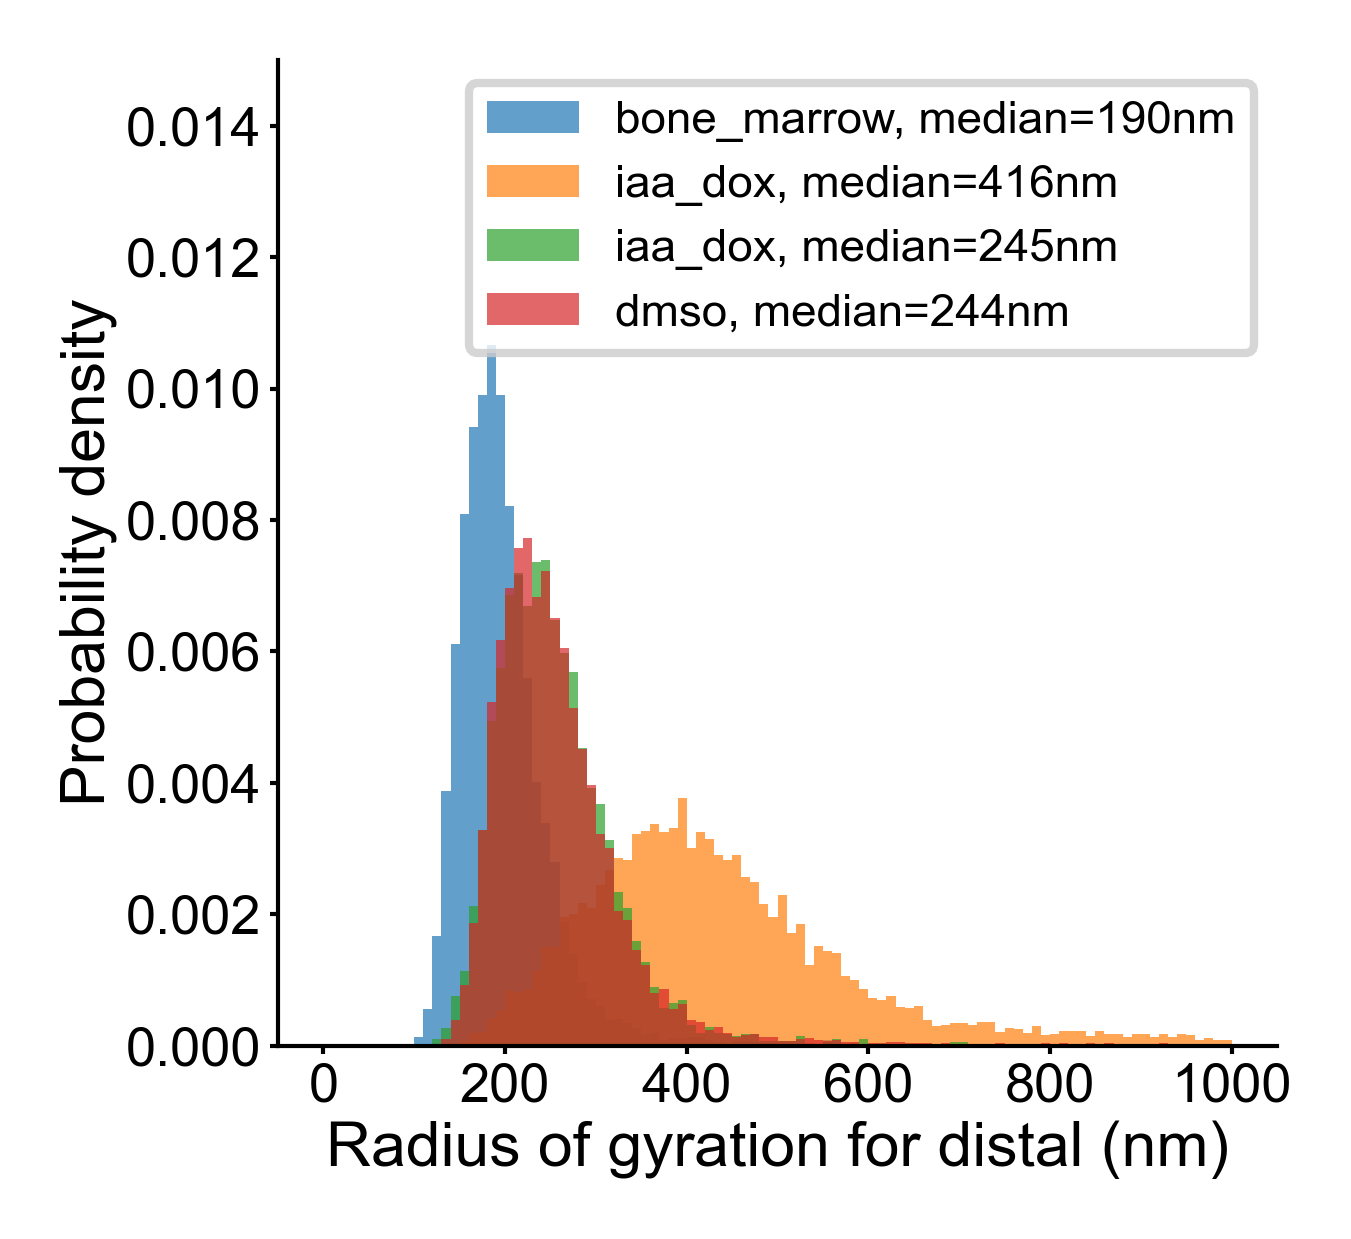

In [160]:
_font_size=7.5
fig, ax = plt.subplots(figsize=(_single_col_width, _single_col_width), dpi=600)
ax.hist(bone_marrow_d_rgs, 100, range=(0,1000), 
        density=True,  
        alpha=0.7, label=f'bone_marrow, median={np.nanmedian(bone_marrow_d_rgs):.0f}nm')
ax.hist(iaa_dox_d_rgs, 100, range=(0,1000), 
        density=True,  
        alpha=0.7, label=f'iaa_dox, median={np.nanmedian(iaa_dox_d_rgs):.0f}nm')
ax.hist(iaa_dox_rep_d_rgs, 100, range=(0,1000), 
        density=True,  
        alpha=0.7, label=f'iaa_dox, median={np.nanmedian(iaa_dox_rep_d_rgs):.0f}nm')
ax.hist(dmso_d_rgs, 100, range=(0,1000), 
        density=True,  
        alpha=0.7, label=f'dmso, median={np.nanmedian(dmso_d_rgs):.0f}nm')

ax.tick_params('both', labelsize=_font_size-1, 
                width=_ticklabel_width, length=_ticklabel_size-1,
                pad=1, labelleft=True) # remove bottom ticklabels for ax
[i[1].set_linewidth(_ticklabel_width) for i in ax.spines.items()]

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(fontsize=_font_size-2)
ax.set_xlabel("Radius of gyration for distal (nm)", labelpad=1, fontsize=_font_size)
ax.set_ylabel("Probability density", labelpad=1, fontsize=_font_size)
ax.set_ylim([0,0.015])
plt.gcf().subplots_adjust(bottom=0.15, left=0.16)
save_file = os.path.join(save_fig_folder, f'RG_combined_distal.png')
plt.savefig(save_file, transparent=True)
print(save_file)
plt.show()